# Content

- CNN
    - Convolution & Maxpooling
    - nn.Conv2d
    - nn.Maxpool2d
    - CNN Structure

Exercise1

- Various Techniques
    - Preparation
    - Why do we use Deep Neural Network?
    - Gradient Vanishing Problem
        - When we use sigmoid as activation function
        - When we use ReLU as activation function
    - Regularization
        - Early stopping
        - Dropout
    - Batch Normalization

Exercise2

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

# Part1. CNN


## Convolution & Maxpooling


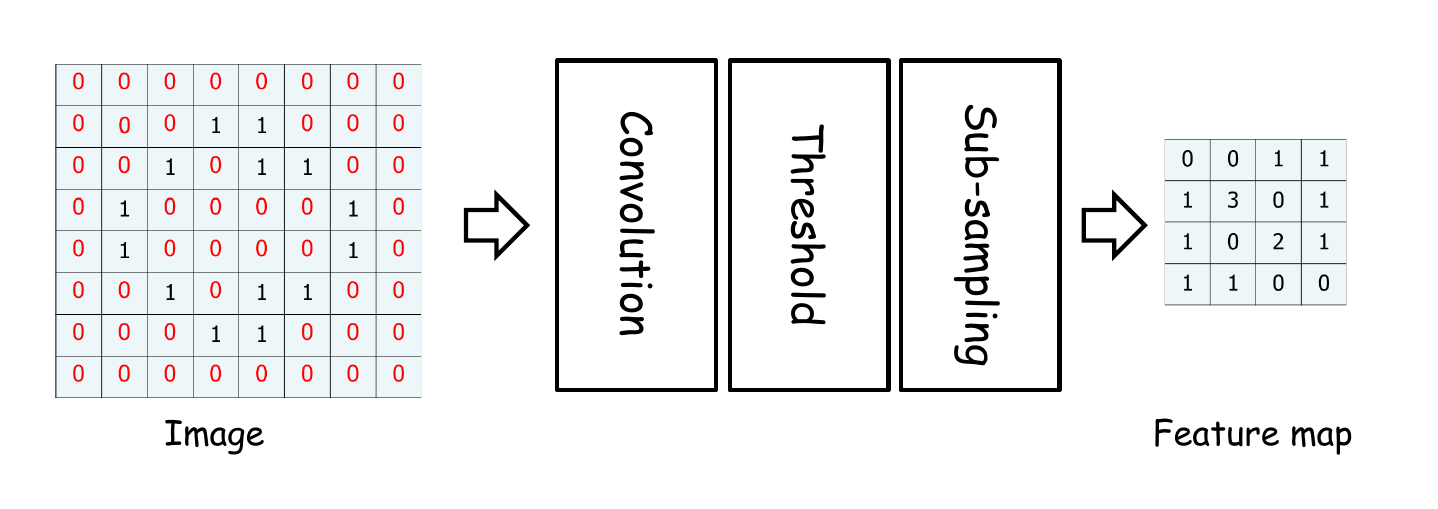

Summary

- Convolution? : A way to find out local features
- One of feature extraction method
- Use threshold to get zeros (negative values will be zero by activation function)
- Maxpooling? : Reduce the number of params, generate more robust feature maps



## nn.Conv2d()

이탤릭체 텍스트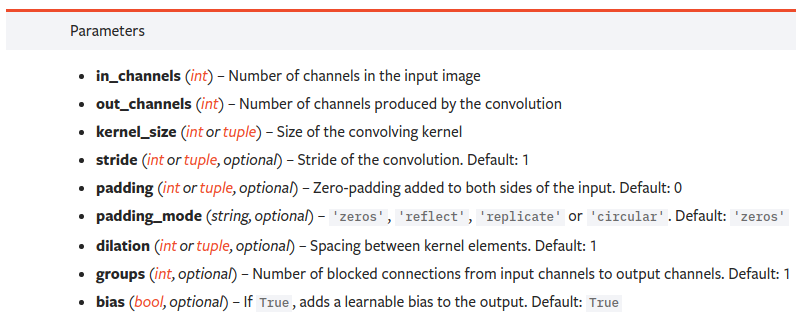


-> padding 까지 알면되고, 밑에 것들은 간간히 쓸 것

- stride 늘리면 model 가벼워진다

In [3]:
conv_1d = torch.nn.Conv2d(in_channels=3,
                               out_channels=num_filters, # num of feature maps
                               kernel_size=window_size,
                               stride=1, 
                               padding=0)

NameError: ignored

### Calculation

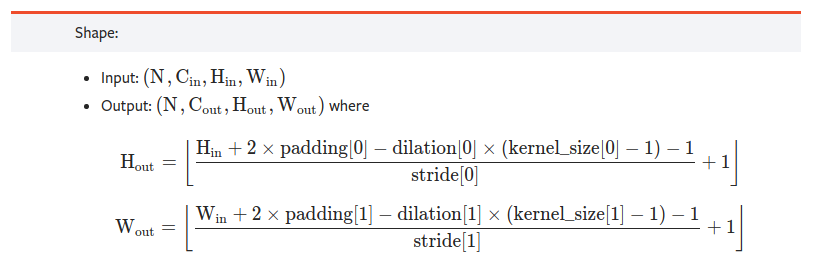

CNN에서 계산도 중요하다.

In [ ]:
input = torch.randn(20, 16, 50, 100)

In [ ]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
print(m(input).shape)

In [ ]:
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
print(m(input).shape)

In [ ]:
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m(input).shape)

## nn.Maxpool2d

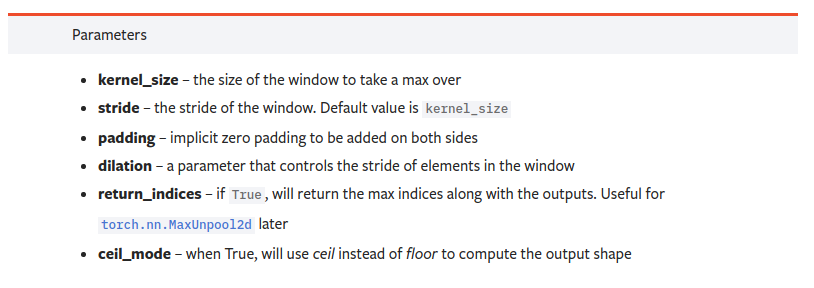

In [ ]:
# if we dont specify stride, then 
m = nn.MaxPool2d(5)
print(m(input).shape)

2x2 kernel, stride = 2

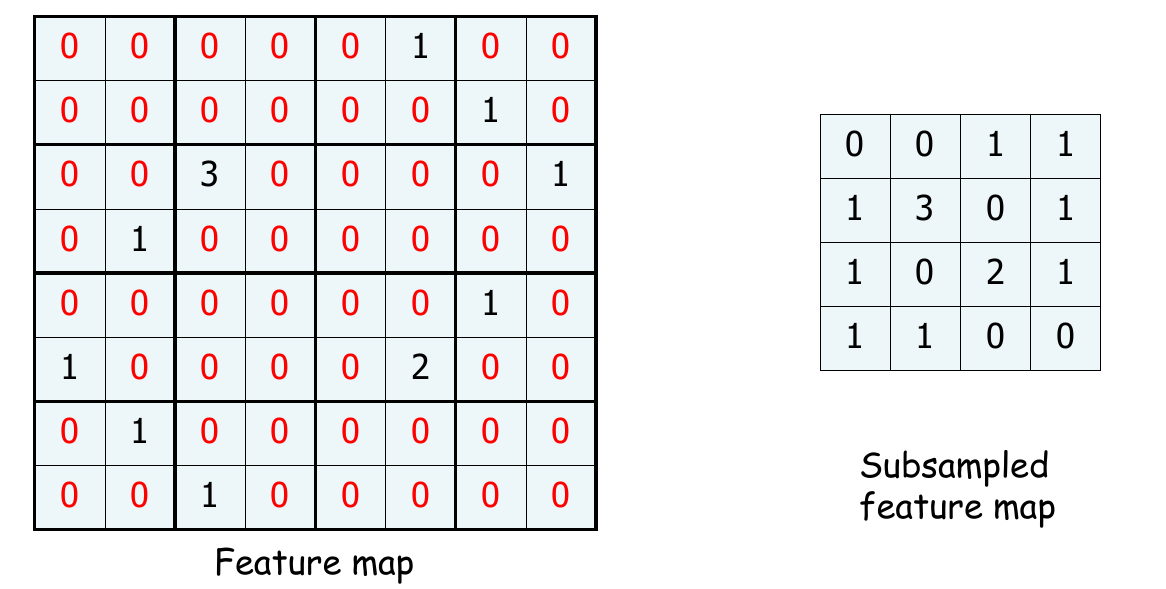

In [ ]:
m = nn.MaxPool2d(4, stride=3)
print(m(input).shape)

### Calcuation

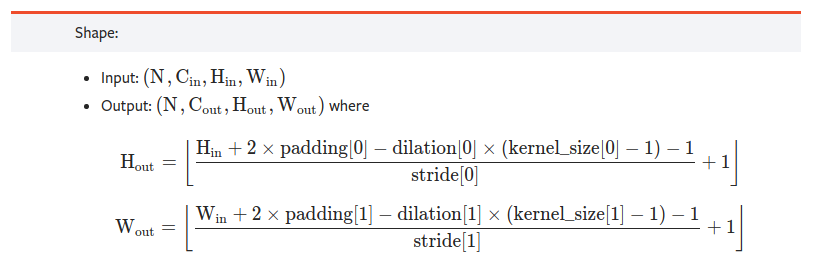

$ dimension = floor( \frac{dimension + 2 * padding - {kernelsize}}{stride} + 1)$

## CNN Structure

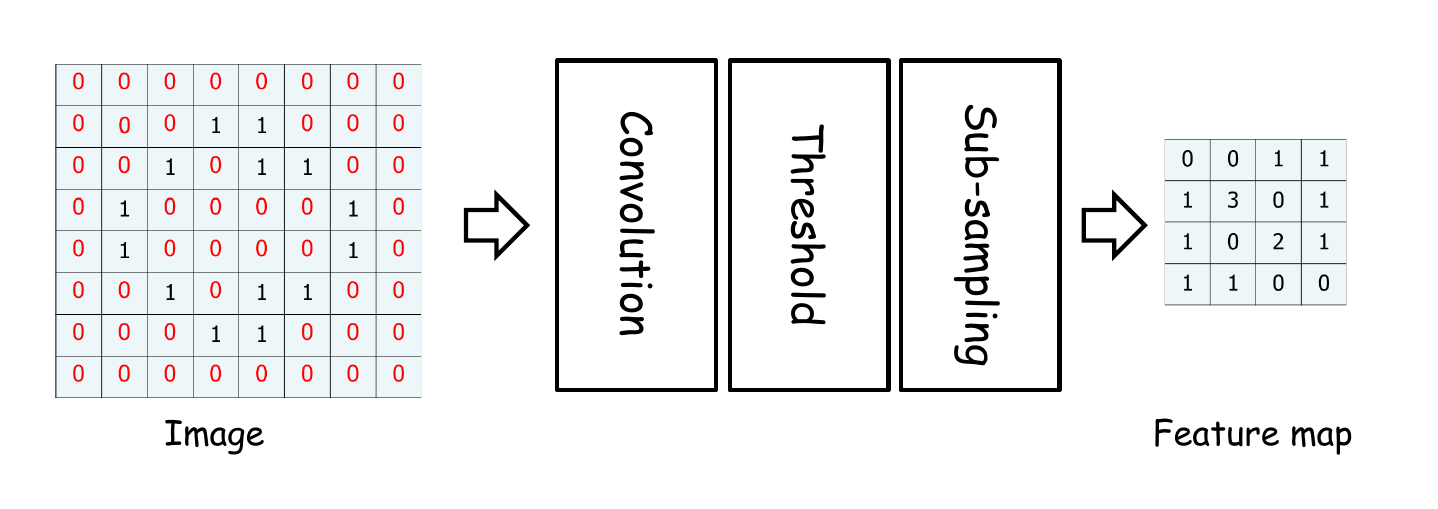

In [4]:
layer = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

nn. 각각의 소스코드를 보면 안에 포워드가 따로따로 존재


In [ ]:
print(layer(input).shape)

## Tips

In [ ]:
class NN_example(nn.Module):
    def __init__(self, num_classes=10):
        super(NN_example, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):                   # batch_size x image_channel x height x width
        x = x.view(-1, 32*32*3)             # batch_size x (image_channel * height * width)
        x = F.relu(self.fc1(x))             # batch_size x 256
        x = F.relu(self.fc2(x))             # batch_size x 128
        x = F.relu(self.fc3(x))             # batch_size x 64
        x = F.relu(self.fc3(x))             # batch_size x num_classes
        return x

위의 annotation과 같이 model에 대하여 size 설명을 해주는 것이 좋다

class를 사용하는 것이 필수는 아니지만 모델구조를 확인하기 좋기에 많이 사용.

# Exercise 1


## Q1

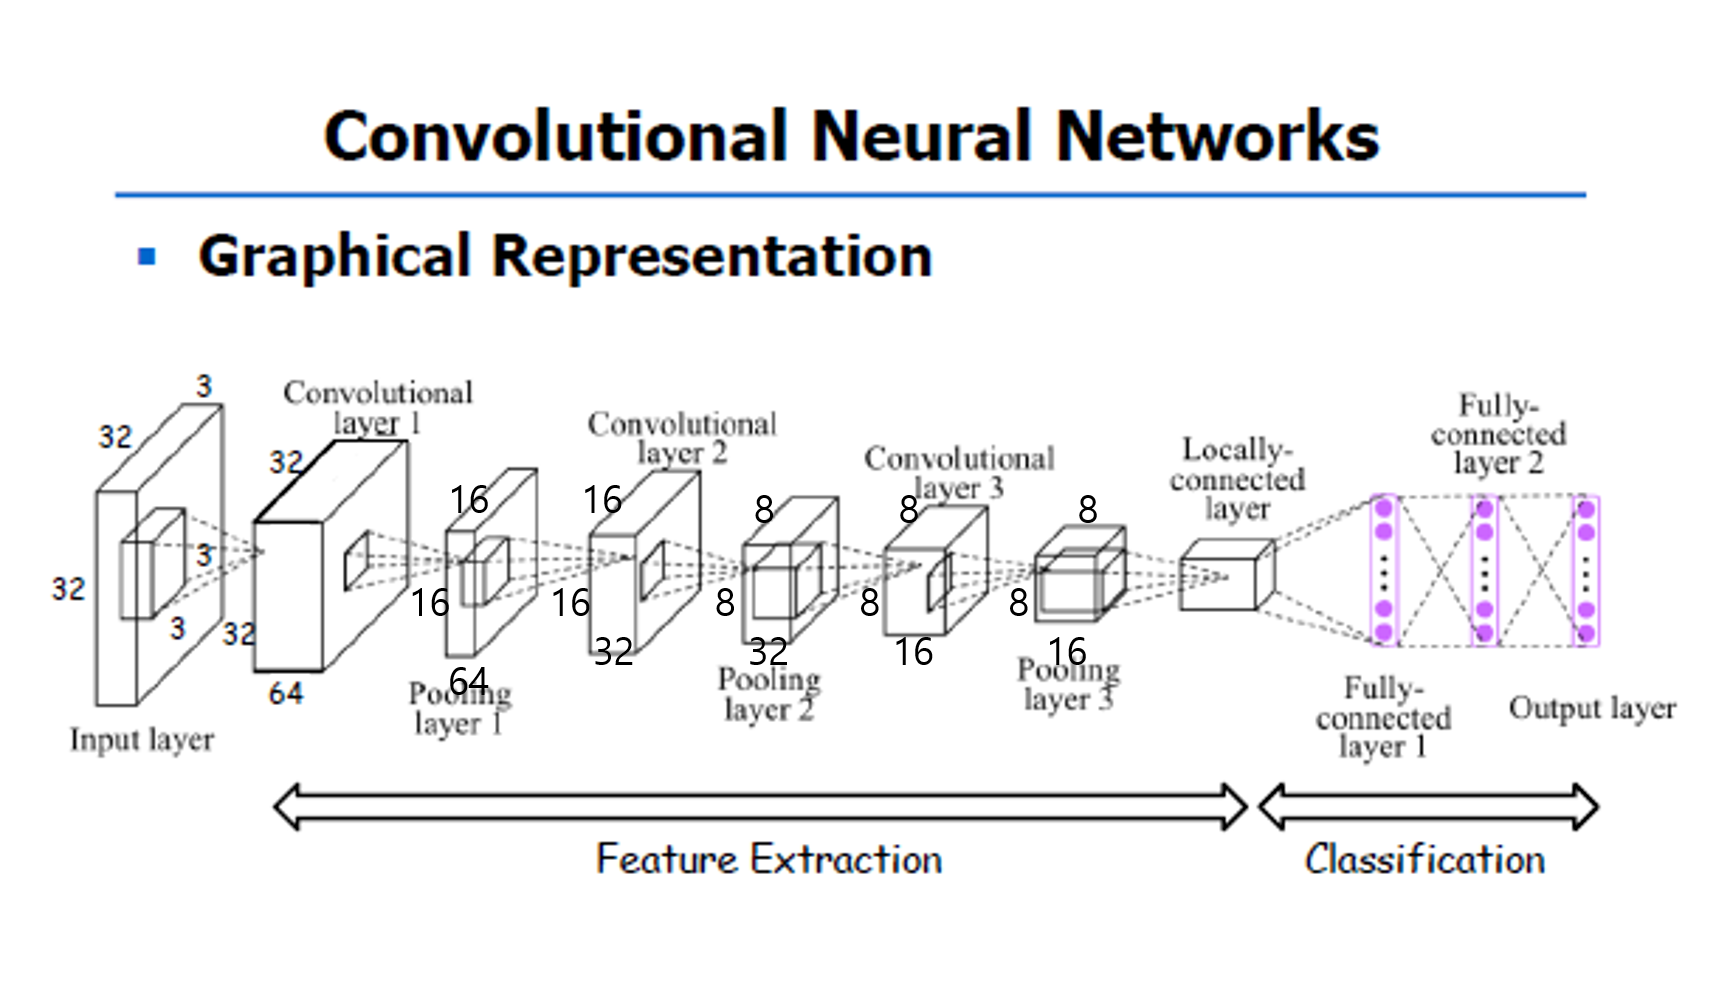



This is the Graphical representation of common CNN. As it describes the shape of data at each layer, please implement the CNN. You can freely design the last three fully-connected layer by your own.

- You must use nn.Sequential to build each layer. 
- If you are confused with the shape of data, do not use nn.sequential first, print out the data shape at each operation.  


pooling 없이 사이즈  줄이는 법

-> kernel , padding , stride 사이즈 조절

In [5]:
input = torch.randn(20, 3, 32, 32)

In [16]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(64, 32, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(32, 16, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=1, stride=1)) # kernel_size =3, padding=1 is also possible

        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):

        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=x.view(-1, 16*8*8)
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        out=self.fc3(x)

        return out

model = ConvNet(num_classes=10)

In [17]:
model(input).shape # (20, 10)

torch.Size([20, 10])

# Part2. Various Techniques 

## Preparation

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307, ),(0.3081, ))])

train_dataset = torchvision.datasets.MNIST('./mnist_data/',
                             download=True,
                             train=True,
                             transform=transform)

test_dataset = torchvision.datasets.MNIST("./mnist_data/",
                             download=False,
                             train=False,
                             transform= transform)

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw




Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [19]:
# split train set / valid set
validation_ratio=0.1
random_seed= 17

num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(validation_ratio * num_train))

np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                          sampler=train_sampler, num_workers=2)
valid_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                          sampler=valid_sampler, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                         shuffle=False, num_workers=2)

## Why we use Deep Meural Network?


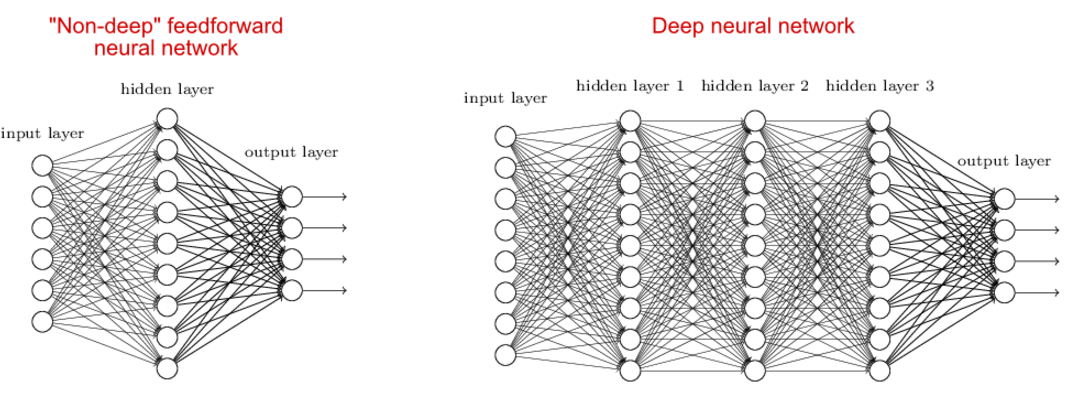

## Gradient Vanishing Problem

### When we use sigmoid as activation funciton

In [20]:
class Deeeep_NN(nn.Module):
    def __init__(self, num_classes=10):
        super(Deeeep_NN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 384)
        self.fc2 = nn.Linear(384,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,96)
        self.fc5 = nn.Linear(96, 64)        
        self.fc6 = nn.Linear(64, 48)
        self.fc7 = nn.Linear(48, 32)
        self.fc8 = nn.Linear(32, 24)
        self.fc9 = nn.Linear(24, 16)
        self.fc10 = nn.Linear(16, num_classes)


      # Ten layer



    def forward(self, x):                   # batch_size x image_channel x height x width
        x = x.view(-1, 32*32*3)             # batch_size x (image_channel * height * width)
        x = F.sigmoid(self.fc1(x))            
        x = F.sigmoid(self.fc2(x))       
        x = F.sigmoid(self.fc3(x))    
        x = F.sigmoid(self.fc4(x))
        x = F.sigmoid(self.fc5(x))
        x = F.sigmoid(self.fc6(x))
        x = F.sigmoid(self.fc7(x))
        x = F.sigmoid(self.fc8(x))        
        x = F.sigmoid(self.fc9(x))
        x = self.fc10(x)             

        # use sigmoid function for activation func
        
        return x

In [21]:
input = torch.randn(20, 3, 32, 32)
label = torch.randint(0, 10, (20,)).long()

In [22]:
model = Deeeep_NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [23]:
out = model(input)
# out.shape
loss = criterion(out, label)
loss.backward()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [24]:
for p,n in zip(model.parameters(),model.named_parameters()):
    if n[0][-6:] == 'weight':
        print('===========\ngradient:{}\n----------\n{}'.format(n[0],p.grad.mean()))
    # else:
        # print(n[0][-6:])


    # named parameter 에서 이름가져와서 이름에 weight 들어가있으면 gradient mean 내겠다는 것.

gradient:fc1.weight
----------
2.2166390088469018e-13
gradient:fc2.weight
----------
1.1120710602385842e-10
gradient:fc3.weight
----------
-1.9561603448181586e-09
gradient:fc4.weight
----------
-1.2519199010796456e-08
gradient:fc5.weight
----------
-2.4206352478017834e-08
gradient:fc6.weight
----------
-1.047929572450812e-06
gradient:fc7.weight
----------
-1.0728494089562446e-05
gradient:fc8.weight
----------
2.74409194389591e-05
gradient:fc9.weight
----------
0.0009418445988558233
gradient:fc10.weight
----------
-2.3283064365386963e-10


### When we use ReLU as activation funciton

In [25]:
class Deeeep_NN(nn.Module):
    def __init__(self, num_classes=10):
        super(Deeeep_NN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 384)
        self.fc2 = nn.Linear(384,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,96)
        self.fc5 = nn.Linear(96, 64)        
        self.fc6 = nn.Linear(64, 48)   
        self.fc7 = nn.Linear(48, 32)
        self.fc8 = nn.Linear(32, 24)
        self.fc9 = nn.Linear(24, 16)
        self.fc10 = nn.Linear(16, num_classes)

    def forward(self, x):                   # batch_size x image_channel x height x width
        x = x.view(-1, 32*32*3)             # batch_size x (image_channel * height * width)
        x = F.relu(self.fc1(x))            
        x = F.relu(self.fc2(x))       
        x = F.relu(self.fc3(x))    
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))        
        x = F.relu(self.fc9(x))
        x = self.fc10(x)             
        return x

In [26]:
model = Deeeep_NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [27]:
out = model(input)
# out.shape
loss = criterion(out, label)
loss.backward()

In [28]:
for p,n in zip(model.parameters(),model.named_parameters()):
    if n[0][-6:] == 'weight':
        print('===========\ngradient:{}\n----------\n{}'.format(n[0],p.grad.mean()))
    # else:
        # print(n[0][-6:])

gradient:fc1.weight
----------
6.324725632111949e-09
gradient:fc2.weight
----------
-5.437806649410959e-08
gradient:fc3.weight
----------
5.427553162462573e-08
gradient:fc4.weight
----------
-2.9330502115954005e-07
gradient:fc5.weight
----------
2.2345898287312593e-07
gradient:fc6.weight
----------
-2.762919166343636e-06
gradient:fc7.weight
----------
-2.0851230146945454e-05
gradient:fc8.weight
----------
-4.10524990002159e-05
gradient:fc9.weight
----------
0.0002127222396666184
gradient:fc10.weight
----------
1.688022222001706e-10


more good than sigmoid ? ?

## Regularization



### Early stopping

answer of when to stop


Application

In [29]:
count = 0

# training loop
    # at each epoch
    if valid_acc > best_valid_acc:
        # save_best_model
        # epoch 마다 비교
        count = 0

    else:
        count += 1
        if count >=3:
            break # stop training vali acc is less than the best 3 times in a row
            # 학습이 잘 안되고있다는 뜻


IndentationError: ignored

### Dropout

Application

In [ ]:
layer = nn.Sequential(
    nn.Linear(32, 8),
    nn.ReLU(),

In [ ]:
model_dropout = nn.Sequential(
    nn.Linear(32, 8),
    nn.Dropout(0.2), # 20% will be removed !  # delete 
    nn.ReLU(),

## Batch Normalization

Application

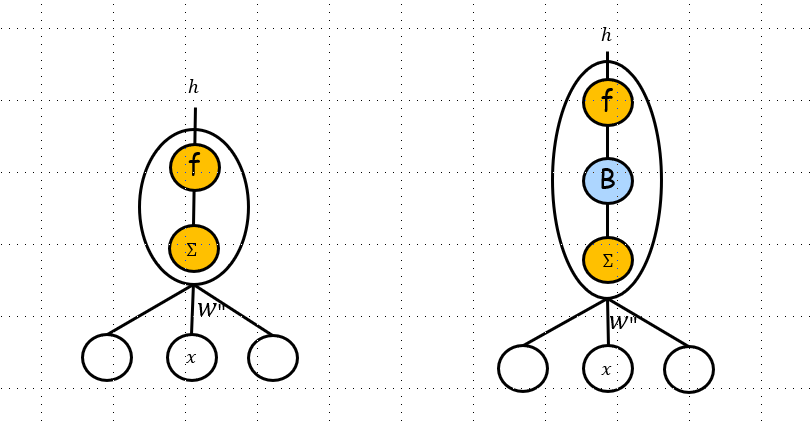

In [ ]:
layer = nn.Sequential(
    nn.Linear(784, 48),
    nn.ReLU(),
)

In [ ]:
layer_bn = nn.Sequential(
    nn.Linear(784, 48),
    nn.BatchNorm1d(48), # applying batch norm 1d # because linear
    nn.ReLU(),
)

CNN

In [ ]:
layer = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

In [ ]:
layer_bn = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32), # applying batch norm 2d
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

# Exercise 2

## Q1.

Apply dropout to the model. Implement the function which operate full training process

- Your model must have dropout at each layer
- Your model must take a parameter "dropout_prob", to initialize dropout probability of your dropout parts.
- Use dataloader to loop over dataset
- Skip validation to make your code shorter and faster 

784(input shape)-256-256-128-10(output shape) by using only nn.linear?


In [ ]:
class TestNet(nn.Module):
      def __init__(self, drop_p):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(784, 256),
                                    nn.Dropout(drop_p),
                                    nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(256, 256),
                                    nn.Dropout(drop_p),
                                    nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(256, 128),
                                    nn.Dropout(drop_p),
                                    nn.ReLU())
        slf.fc = nn.Linear(128, 10)


      def forward(self, x):
        
        x = x.view(-1, 784)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        out = self.fc(x)

        return out


In [ ]:
def train_test(dropout_prob, nb_epoch, loss_func, optim, train_dl, test_dl, device):
    # initialize model
    model = TestNet(dropout_prob) # use dropout_prob to initialize
    model = model.to(device)

    # train process
    total =
    correct =

    for epoch in range(nb_epoch):  # loop over the dataset multiple times
    

    # calculate training error of last epoch
    accuracy
    train_error = 1 - acc

    # test process

    test_acc
    test_error = 1 - test_acc

    print([dropout_prob]) # print 하는 거 추가
    return 

## Q2.

Plot the classification error difference by dropout probability by the function you make.

- 

In [ ]:
device = torch.device("cuda")
criterion = 
optimizer = 

In [33]:
import numpy as np

drop_p_list = np.linspace(0.1, 1, 10)

In [32]:
for drop_p in drop_p_list :
  train_err, test_err = train_test(dropout_prob = drop_p, 10, criterion, optimizer, train_loader, device)
  train_error.append(train_err)
  test_error.append(test_err)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
plt.plot(drop_p_lsit, train_error)
plot.plot(drop_p_list, test_error)
pplt.xlabel("drop prob")
plt.ylabel("classification error")
plt.show()

It is good that it is similer with under ppt image.

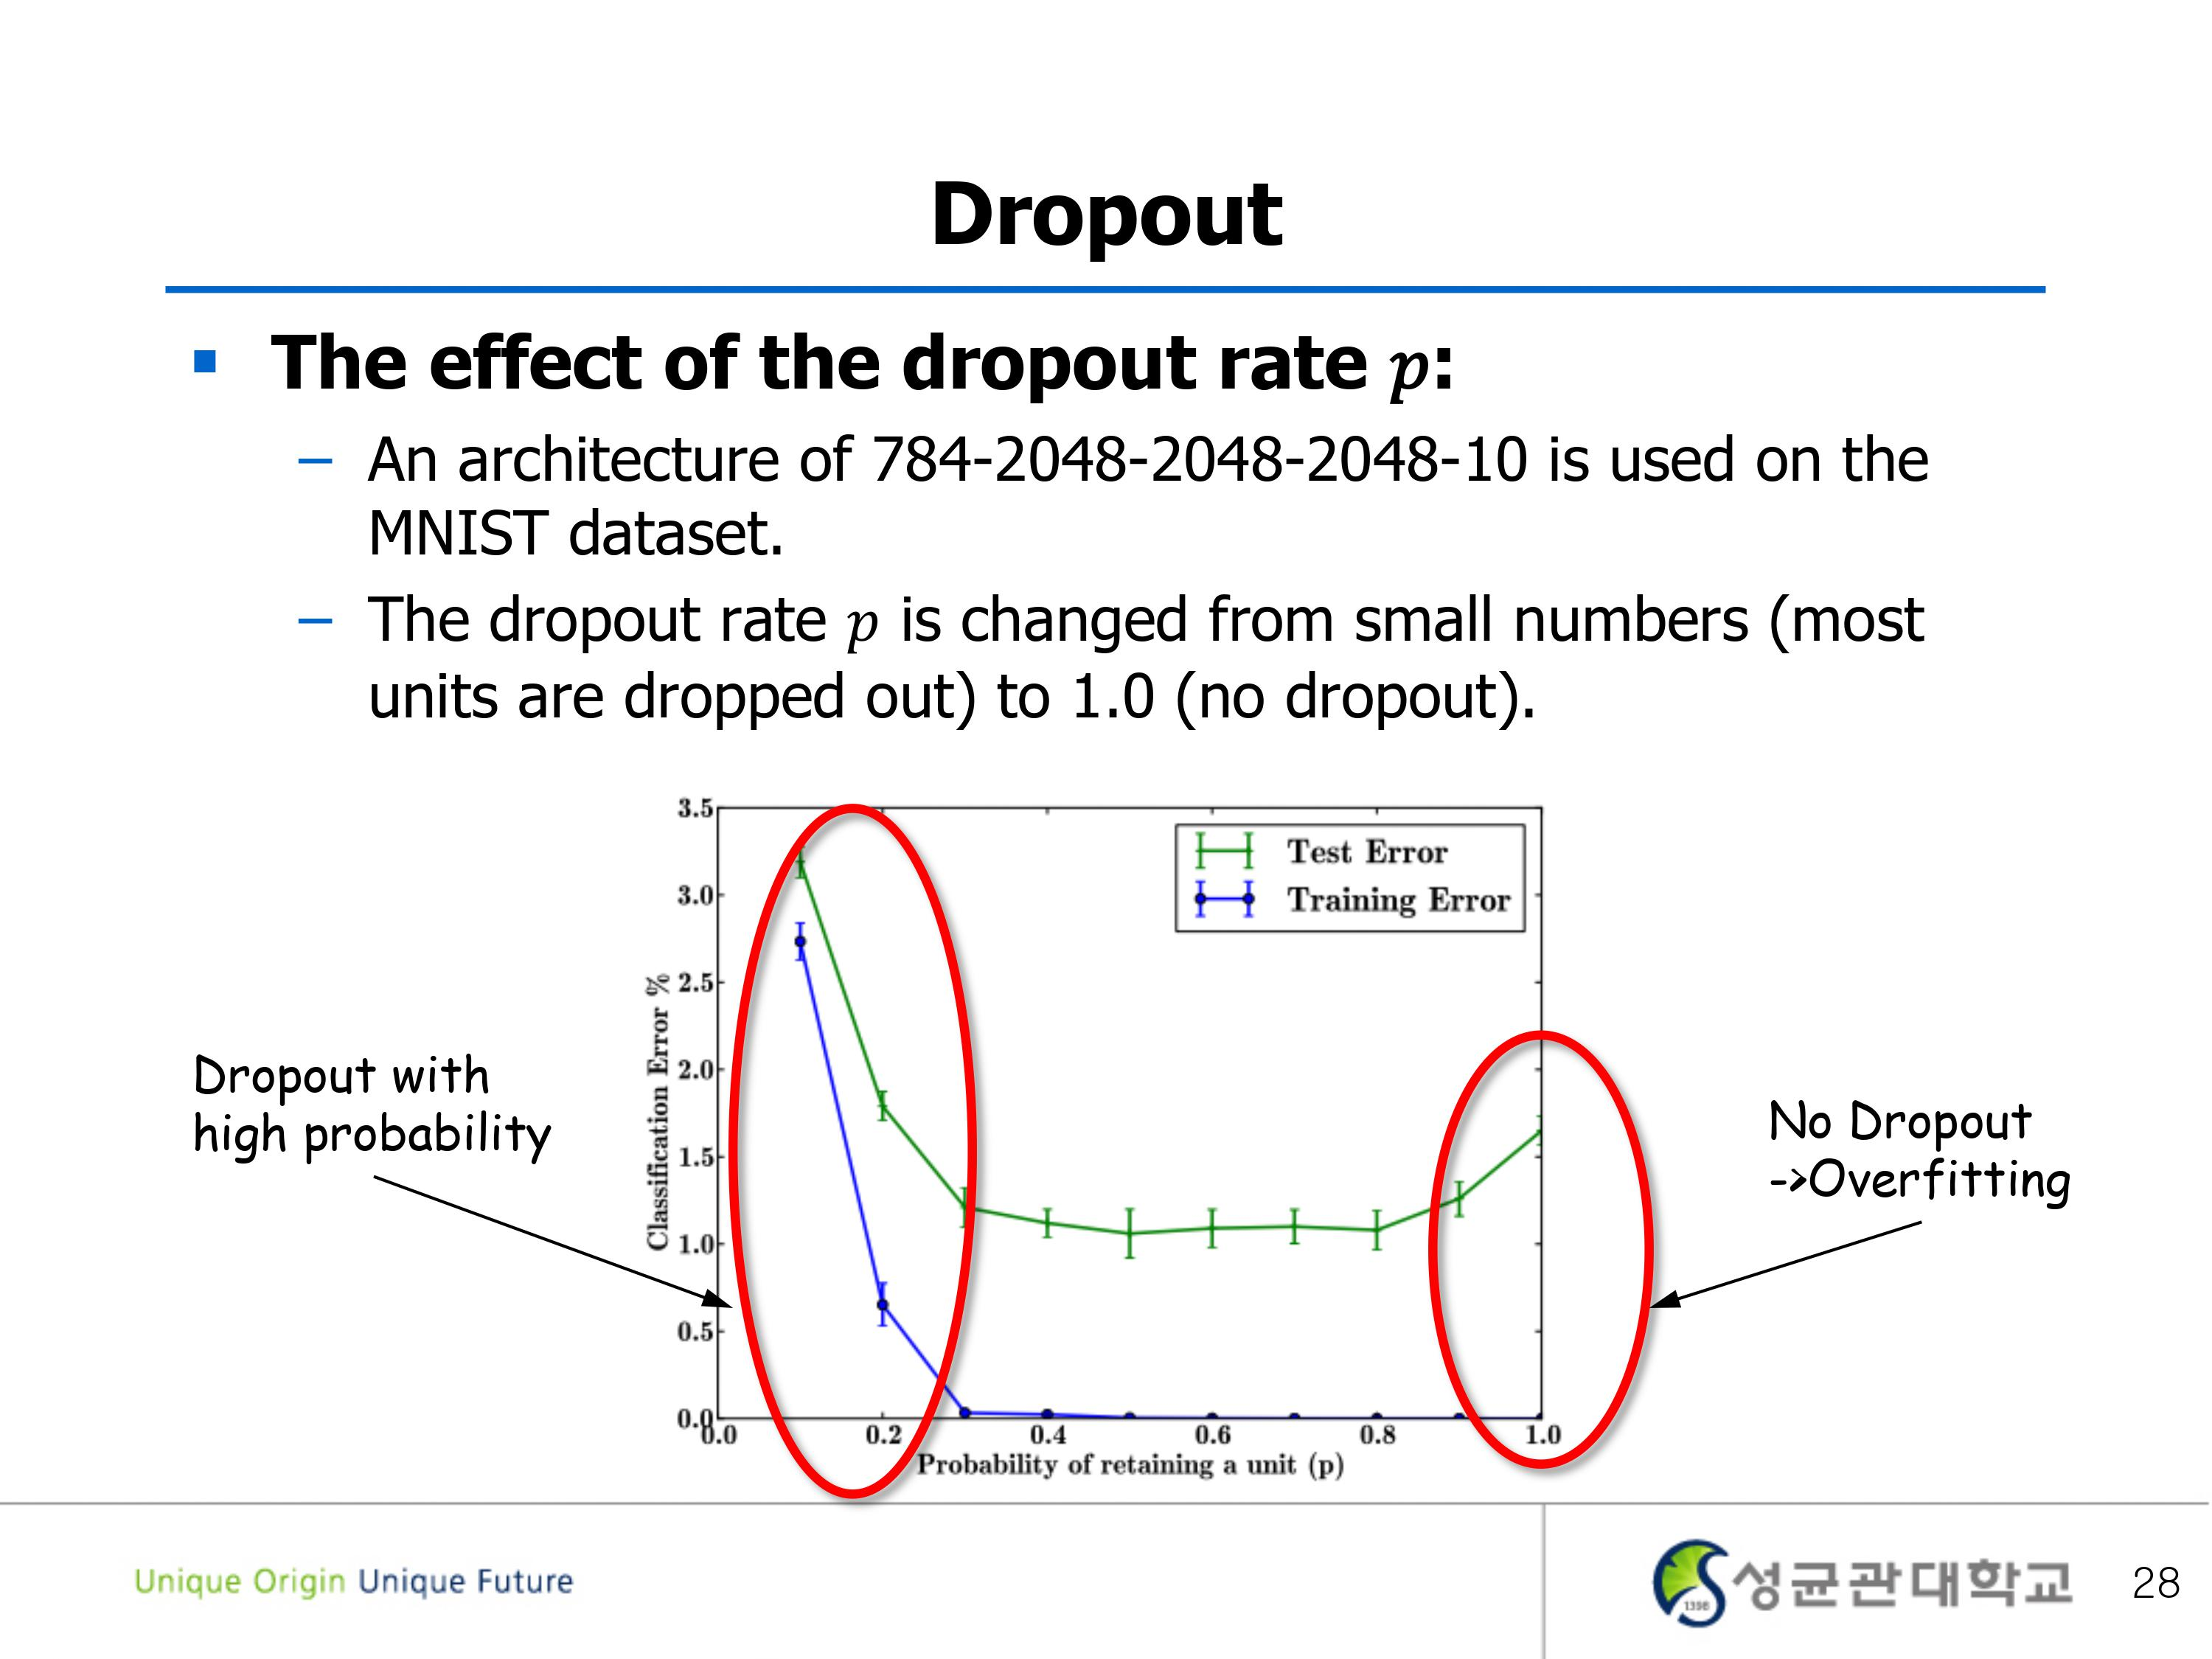